In [ ]:
run(`java -jar RandomClusteringNetwork.jar`)

In [1]:
push!(LOAD_PATH, pwd())
using PyPlot
using RandomClusteringGraph, Distributions, LightGraphs, GraphCreation, IndirectRec

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [34]:
mean(Gamma(2.0,10))

20.0

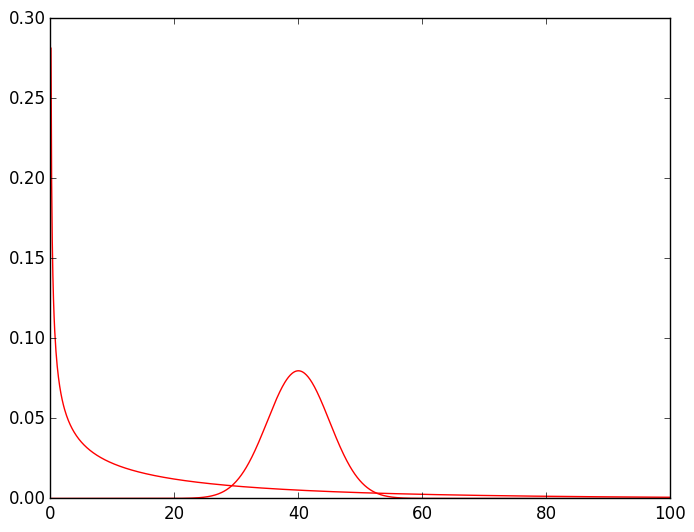

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32408f5d0>

In [36]:
x = 0:0.1:100
d = Gamma(0.5,K)
d2 = Normal(K,5)
plot(x,pdf(d,x),"r")
plot(x,pdf(d2,x),"r")

In [254]:
K = 10
N = 400
C = 0.001


g = random_clustering_graph(Gamma(1.0,K),N,C) 
k = 2*ne(g)/nv(g)
c = mean(local_clustering_coefficient(g))
println("k: $k, c: $c")

Degree_changed 1
Degree_changed 1
k: 9.271767810026386, c: 0.07516546796926502


## Clustering in Watts Strogatz random graphs

Every ``random'' ($p=1$) edge produces a triangle with probablility $c1 = K/N$

Every fixed edge ($p = 0$) produces a triangle with probability $c0 = \frac{3*(K-2)}{4*(K-1)}$

Every pristine triangle remains if all three of its edges remain intact, which happens with probability $(1-p)^3$.

Thus, we have
$$C = c1 + (c0 - c1) (1 - p)^3$$
or
$$p = 1 - \left(\frac{C - c1}{c0 - c1}\right)^{1/3}$$

Every edge that is randomly rewired causes

In [238]:

function watts_strogatz_get_clustering(N,K,beta)
    c1,c0 = watts_strogatz_clustering_limits(N,K)
    return c1 + (c0-c1)*(1-beta)^3
end

function watts_strogatz_get_beta(N,K,C)
    c1,c0 = watts_strogatz_clustering_limits(N,K)
    beta = 1 - ((C - c1)/(c0 - c1))^(1.0/3)
    return beta
end

function watts_strogatz_clustering_limits(N,K)
    c1 = K/N
    c0 = 3*(K-2)/(4*(K-1))
    return c1,c0
end

function watts_strogatz_with_custering(N,K,C)
    c1,c0 = watts_strogatz_clustering_limits(N,K)
    C = clamp(C,c1,c0)
    beta = watts_strogatz_get_beta(N,K,C)
    return watts_strogatz(N,K,beta)
end

watts_strogatz_with_custering (generic function with 1 method)

In [241]:
clamp(11,0,20)

11

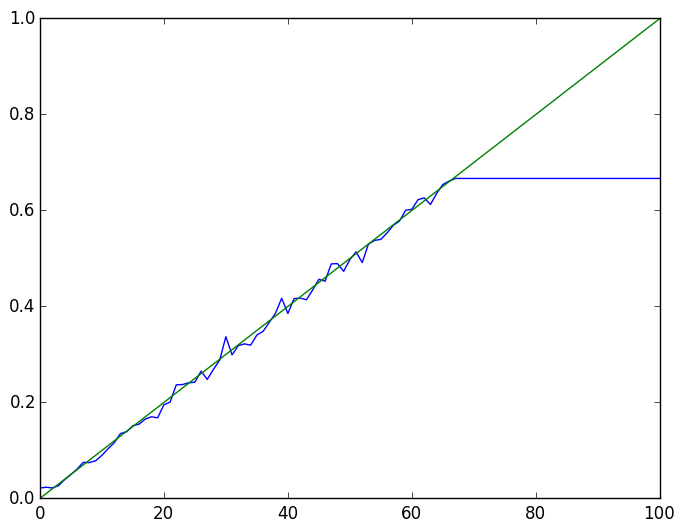

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32a906ed0>

In [242]:
N = 400
K = 10
C = 0.23
c1,c0 = watts_strogatz_clustering_limits(N,K)
c_est_range = 0:0.01:1

# beta_range = 0.0:0.05:1.0
c_range = similar(c_est_range)
for (i,c_est) in enumerate(c_est_range)
    g = watts_strogatz_with_custering(N,K,c_est)
    k = 2*ne(g)/nv(g)
    c = mean(local_clustering_coefficient(g))
    c_range[i] = c
end
plot(c_range)
plot(c_est_range)

In [226]:
N = 200
K = 20
beta = 0.5
beta_range = 0.0:0.05:1.0
c_range = similar(beta_range)
c_est_range = similar(beta_range)
for (i,beta) in enumerate(beta_range)
    g = watts_strogatz(N,K,beta)
    k = 2*ne(g)/nv(g)
    c = mean(local_clustering_coefficient(g))
    c_range[i] = c
    c_est_range[i] = watts_strogatz_get_clustering(N,K,beta)
end



println(c1 + (c0-c1)*(1-beta)^3)
println(c/c0," ",(1-beta)^3)

k: 20.0, c: 0.7105263157894735
k: 20.0, c: 0.6159456668389569
k: 20.0, c: 0.5279802941875732
k: 20.0, c: 0.45705747928878226
k: 20.0, c: 0.4078662809551017
k: 20.0, c: 0.34070112961887433
k: 20.0, c: 0.3059656285885186
k: 20.0, c: 0.25381462260662013
k: 20.0, c: 0.22340834788469727
k: 20.0, c: 0.18660548132538307
k: 20.0, c: 0.16600382387831802
k: 20.0, c: 0.14269360794079464
k: 20.0, c: 0.13163703582055314
k: 20.0, c: 0.1099035001387378
k: 20.0, c: 0.10448866201506726
k: 20.0, c: 0.10689790933826478
k: 20.0, c: 0.09578006362427549
k: 20.0, c: 0.09906857561482862
k: 20.0, c: 0.09751731196693937
k: 20.0, c: 0.095068063895486
k: 20.0, c: 0.0946844779689981
0.1
0.1332596356600714 0.0


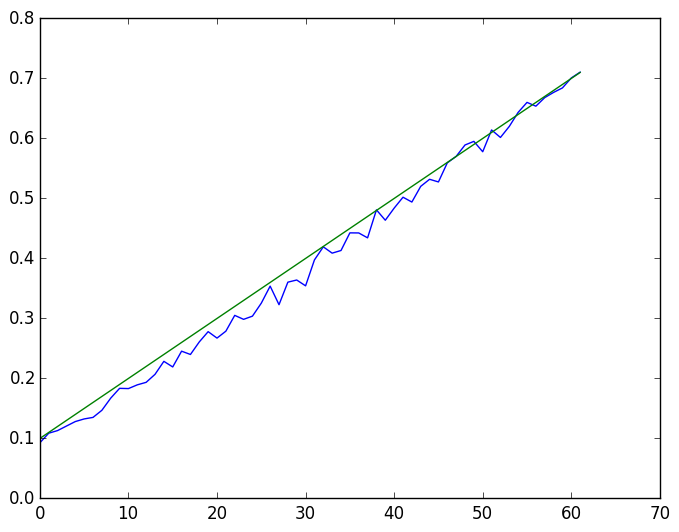

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x329395310>

In [223]:
plot(c_range)
plot(c_est_range)

In [35]:
# d = Normal(44,15)
# H = create_graph(4040,44,:fb)
# d = fit(Pareto,degree(H))
d = fit(Gamma,degree(H))
N = 4040
C = 0.6
G = random_clustering_graph(d,N,C) 

Degree_changed 55
Degree_changed 48
Degree_changed 45
Degree_changed 41
Degree_changed 36
Degree_changed 36
Degree_changed 35
Degree_changed 33
Degree_changed 33
Degree_changed 32
Degree_changed 29
Degree_changed 29
Degree_changed 27
Degree_changed 27
Degree_changed 27
Degree_changed 27
Degree_changed 26
Degree_changed 23
Degree_changed 22
Degree_changed 21
Degree_changed 20
Degree_changed 19
Degree_changed 19
Degree_changed 17
Degree_changed 17
Degree_changed 16
Degree_changed 16
Degree_changed 14
Degree_changed 14
Degree_changed 13
Degree_changed 3
Degree_changed 1
Degree_changed 100
Degree_changed 95
Degree_changed 86
Degree_changed 84
Degree_changed 84
Degree_changed 83
Degree_changed 81
Degree_changed 79
Degree_changed 79
Degree_changed 79
Degree_changed 76
Degree_changed 75
Degree_changed 74
Degree_changed 73
Degree_changed 72
Degree_changed 71
Degree_changed 69
Degree_changed 69
Degree_changed 67
Degree_changed 65
Degree_changed 63
Degree_changed 62
Degree_changed 61
Degree_chan

rm: temp_degree_sequence_2016-03-28T00:36:53.dat: No such file or directory


LoadError: LoadError: failed process: Process(`rm temp_degree_sequence_2016-03-28T00:36:53.dat`, ProcessExited(1)) [1]
while loading In[35], in expression starting on line 7

In [2]:
H = create_graph(4040,44,:fb)

{4039, 88234} undirected graph

In [5]:
#mean(degree(G))
#std(degree(G))
println(mean(local_clustering_coefficient(G))," ", std(local_clustering_coefficient(G)))
println(mean(local_clustering_coefficient(H))," ", std(local_clustering_coefficient(H)))

0.4955951213367213 0.11235649891580025
0.6055467186200862 0.21446218755128868


In [ ]:
using PyPlot

d = Pareto(0.5)
d2 = Pareto(2)

x = 1:0.01:100

loglog(x,pdf(d,x))
loglog(x,pdf(d2,x))
grid()

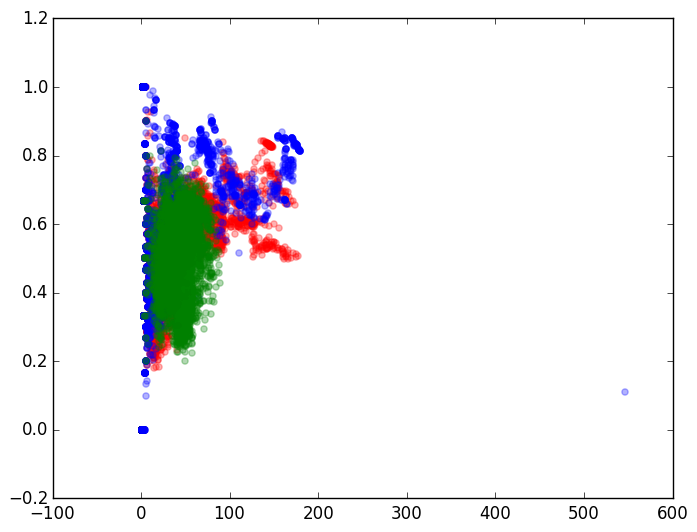

PyObject <matplotlib.collections.PathCollection object at 0x32576c8d0>

In [25]:
scatter(degree(G_gamma),local_clustering_coefficient(G_gamma),color="r",alpha=0.3)
scatter(degree(G_pareto),local_clustering_coefficient(G_pareto),color="b",alpha=0.3)
scatter(degree(G_normal),local_clustering_coefficient(G_normal),color="g",alpha=0.3)
#figure()
#scatter(degree(H),local_clustering_coefficient(H),color="c",alpha=0.1)

In [ ]:
plt[:hist](local_clustering_coefficient(G),bins=20,alpha=0.4,normed=true)
plt[:hist](local_clustering_coefficient(H),bins=20,alpha=0.4,normed=true)

In [34]:
d = fit(Pareto,dh)
d2 = fit(Gamma,dh)

Distributions.Gamma(α=0.9575757690034061, θ=45.626689856990765)

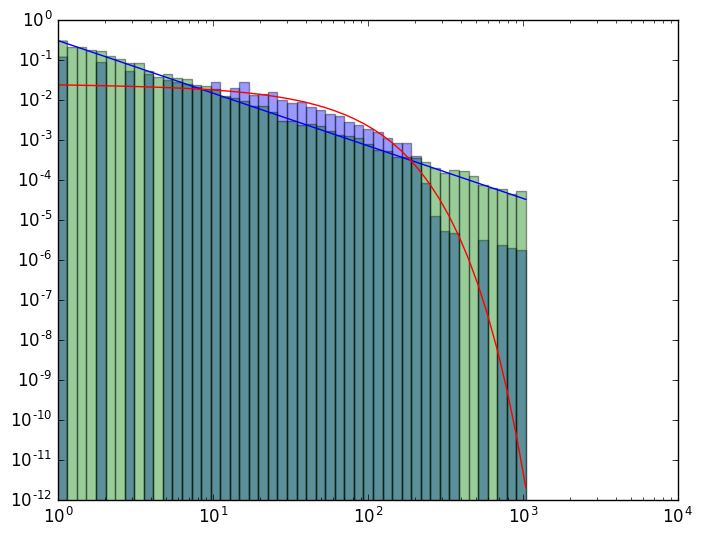

In [11]:
dh = degree(G_)
dg = rand(d,length(dh))

binsh = logspace(log10(minimum(dh)),log10(maximum(dh)),50)


plt[:hist](dh,bins=binsh,alpha=0.4,normed=true,log=true)
plt[:hist](dg,bins=binsh,alpha=0.4,normed=true,log=true)
plot(binsh,pdf(d,binsh),"b")
plot(binsh,pdf(d2,binsh),"r")
gca()[:set_xscale]("log")

#xlim([0,250])

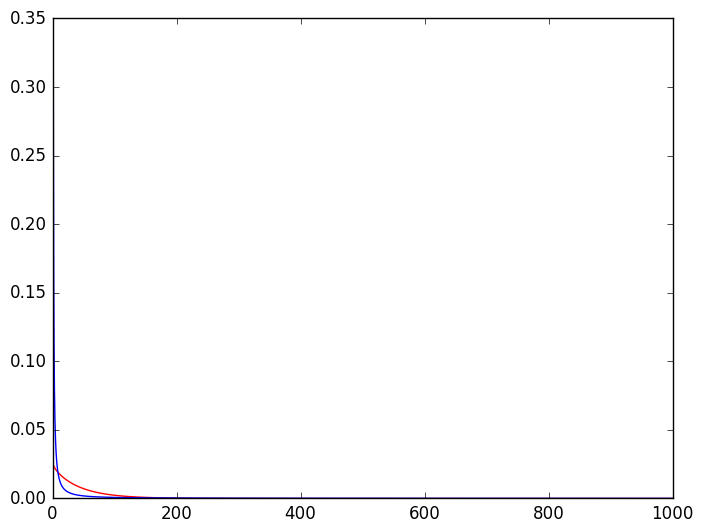

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32a1e0dd0>

In [41]:
x = 0:0.1:1000
plot(x,pdf(d2,x),"r")
plot(x,pdf(d,x),"b")

In [32]:
params(d2)
d3 = Gamma(1.0,mean(degree(H))/0.5)
mean(d3)

87.38202525377568

In [36]:

d = fit(Pareto,dh)
params(d)
#now keep the shape the same and change the scale
#compute the new mean by cutting off the distribution at high x (at N-1)
#dnew = Pareto(params(d))

(0.31533381687538337,1.0)

In [12]:
data_dir_path = "../data/graphs/"
filenames = split(readall(`ls $(data_dir_path)`));
filenames[:]

10-element Array{SubString{ASCIIString},1}:
 "bter_fit_facebook_20160404T165541.dat"                  
 "facebook_combined.txt"                                  
 "fb_to_gamma_fit_clustering.dat"                         
 "fb_to_normal_fit_clustering.dat"                        
 "tgf_out_better_clustering_gamma_fg.dat"                 
 "tgf_out_better_clustering_normal_fg.dat"                
 "tgf_out_fb_gamma_high_clustering.dat"                   
 "tgf_out_gamma_distribution_equal_clustering_fb_fit.dat" 
 "tgf_out_normal_distribution_equal_clustering_fb_fit.dat"
 "tgf_out_pareto_distribution_equal_clustering_fb_fit.dat"

In [13]:
for i = 1:length(filenames)
    G = read_edgelist(data_dir_path * filenames[i])
    println("############")
    println(filenames[i])
    println(mean(degree(G)))
    println(std(degree(G)))
    println(mean(local_clustering_coefficient(G)))
end

############
bter_fit_facebook_20160404T165541.dat
42.840189478932935
47.30755361242027
0.6126826674617479
############
facebook_combined.txt
43.69101262688784
52.42060527402638
0.6055467186200865
############
fb_to_gamma_fit_clustering.dat
41.313380281690144
33.76132105737829
0.6047896932938568
############
fb_to_normal_fit_clustering.dat
61.64977834072197
36.9844056841386
0.6338274476753267
############
tgf_out_better_clustering_gamma_fg.dat
61.330286410725165
38.399684933157914
0.6568840893016283
############
tgf_out_better_clustering_normal_fg.dat
62.01341463414634
36.436166216079855
0.6505051150515151
############
tgf_out_fb_gamma_high_clustering.dat
41.09646705086445
35.983043417425186
0.6113069902330065
############
tgf_out_gamma_distribution_equal_clustering_fb_fit.dat
41.79769654481723
38.35606488158233
0.5103762580037949
############
tgf_out_normal_distribution_equal_clustering_fb_fit.dat
43.65873015873016
14.696317384077492
0.4955951213367213
############
tgf_out_pareto_dist

In [11]:
println(mean(degree(H)))
println(std(degree(H)))
println(mean(local_clustering_coefficient(H)))

43.69101262688784
52.42060527402638
0.6055467186200865


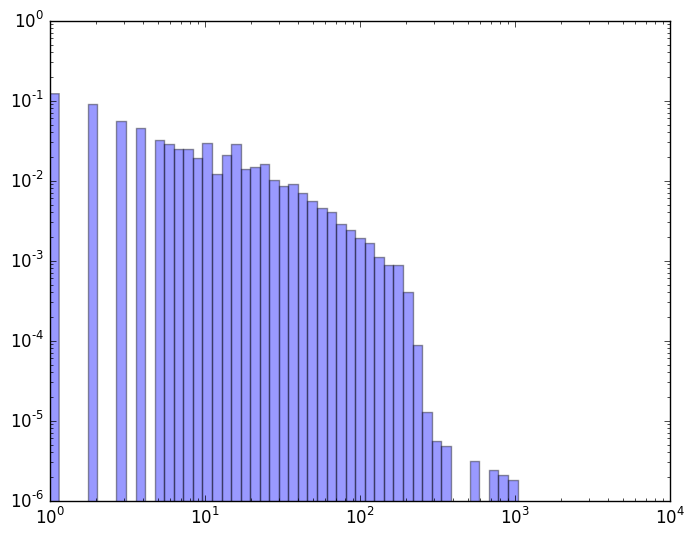

In [12]:
binsh = logspace(log10(minimum(degree(H))),log10(maximum(degree(H))),50)
plt[:hist](degree(H),bins=binsh,alpha=0.4,normed=true,log=true)
gca()[:set_xscale]("log")

In [14]:
d = fit(Normal,degree(H))


Distributions.Normal(μ=43.69101262688784, σ=52.41411556737486)

In [14]:
G_normal = G_gamma
G_gamma =read_edgelist(data_dir_path * filenames[1]) 

{3994, 83470} undirected graph

In [17]:
println("Gamma:")
println(mean(degree(G_gamma)))
println(mean(local_clustering_coefficient(G_gamma)))
println("Normal:")
println(mean(degree(G_normal)))
println(mean(local_clustering_coefficient(G_normal)))

Gamma:
41.79769654481723
0.5103762580037949
Normal:
43.65873015873016
0.4955951213367213


In [6]:
using GraphConnectivityTheory

In [3]:
ch = local_clustering_coefficient(H)

4039-element Array{Float64,1}:
 0.0419617
 0.419118 
 0.888889 
 0.632353 
 0.866667 
 0.333333 
 0.933333 
 0.431579 
 0.678571 
 0.397243 
 0.822222 
 0.651613 
 0.742857 
 ⋮        
 0.0      
 1.0      
 1.0      
 1.0      
 0.368421 
 1.0      
 1.0      
 1.0      
 0.0      
 1.0      
 0.666667 
 0.555556 

In [4]:
function get_num_mutual_neighbors(g::LightGraphs.Graph,e::Pair{Int,Int})
    v1 = e[1]
    v2 = e[2]
    neighbors1 = LightGraphs.neighbors(g,v1)
    neighbors2 = LightGraphs.neighbors(g,v2)
    num_mutual_neighbors = intersection_length(neighbors1,neighbors2)
    return num_mutual_neighbors
end

function get_edgewise_clustering(g::LightGraphs.Graph,v::Int)
    n = LightGraphs.neighbors(g,v)
    clustering = zeros(size(n))
    for (i,w) in enumerate(n)
        clustering[i] = get_num_mutual_neighbors(g,Pair(v,w))
    end
    clustering
end

function get_edgewise_clustering(g::LightGraphs.Graph)
    clustering = Array{Float64,1}[]
    for v in LightGraphs.vertices(g)
        push!(clustering,get_edgewise_clustering(g,v))
    end
    clustering
end

function get_hist_p_known_for_node(g::LightGraphs.Graph,v::Int,p::Float64)
    neighbors = LightGraphs.neighbors(g,v)
    p_knowns = zeros(size(neighbors))
    for (i,w) in enumerate(neighbors)
        p_knowns[i] = 1 - (1-p)*(1-p^2)^get_num_mutual_neighbors(g,Pair(v,w))
    end
    return p_knowns
end

function get_hist_p_known_for_each_node(g::LightGraphs.Graph,p::Float64)
    nodes = LightGraphs.vertices(g)
    ret = Array{Float64,1}[]
    for (i,v) in enumerate(nodes)
        push!(ret,get_hist_p_known_for_node(g,v,p))
    end
    ret
end

get_hist_p_known_for_each_node (generic function with 1 method)

In [20]:
p = 0.1
ech = get_edgewise_clustering(H)
ech_std = zeros(length(ech_P))
hists = Array(Array{Float64,1},length(ech_P))
ech_means = zeros(length(ech))
ech_P = get_hist_p_known_for_each_node(H,p)
ech_P_normalized = Array(Array{Float64,1},length(ech_P))
ech_P_means = zeros(length(degree(H)))
ks = degree(H)
cs = local_clustering_coefficient(H)

for i = 1:length(ech)
    _ = ech[i]
    ech_means[i] = length(_) > 1 ? mean(_)/(length(_)-1)/cs[i] : 0.0
    ech_P_normalized[i] = ech_P[i]./(1 - (1-p)*(1-p^2)^((ks[i] - 1)*cs[i]))
    ech_P_means[i] = mean(ech_P_normalized[i])
    ech_std[i] = mean(_) > 0.0 ? std(_)/mean(_) : 0.0 
    hists[i] = mean(_) > 0.0 ? _ ./(length(_)-1) ./ cs[i] : _.*0.0 
end
hists_concat = Float64[]
normalized_concat = Float64[]
for j = 1:length(hists)
    hists_concat = vcat(hists_concat,hists[j])
    normalized_concat = vcat(normalized_concat,ech_P_normalized[j])
end

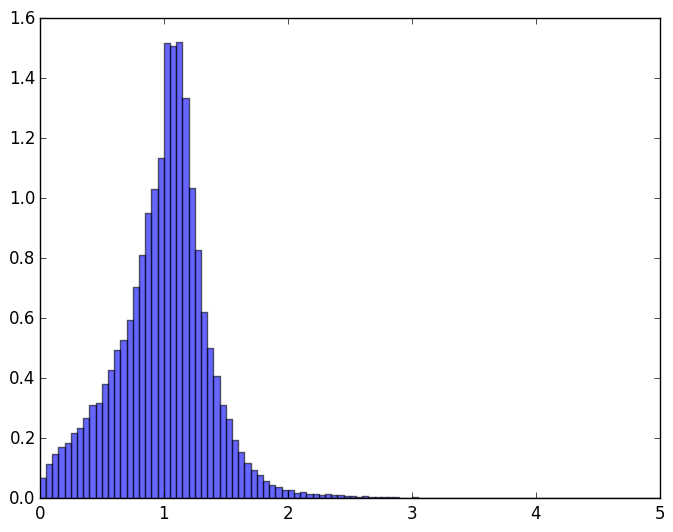

([0.0671012,0.115954,0.146557,0.17104,0.184755,0.219666,0.236214,0.268405,0.311816,0.317597  …  0.000113347,0.000566733,0.000453386,0.00034004,0.000226693,0.000226693,0.00034004,0.000226693,0.000226693,0.000680079],[0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45  …  4.55,4.6,4.65,4.7,4.75,4.8,4.85,4.9,4.95,5.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x325d45ed0>,PyObject <matplotlib.patches.Rectangle object at 0x31de8d090>,PyObject <matplotlib.patches.Rectangle object at 0x31e1e8710>,PyObject <matplotlib.patches.Rectangle object at 0x31e1e8850>,PyObject <matplotlib.patches.Rectangle object at 0x32592fe10>,PyObject <matplotlib.patches.Rectangle object at 0x32592fb10>,PyObject <matplotlib.patches.Rectangle object at 0x32592ff90>,PyObject <matplotlib.patches.Rectangle object at 0x325d1f610>,PyObject <matplotlib.patches.Rectangle object at 0x325d1fd50>,PyObject <matplotlib.patches.Rectangle object at 0x3255ba410>  …  PyObject <matplotlib.patches.Rectangle object at 0x325670b90>

In [21]:
bins = 0:0.05:5
plt[:hist](hists_concat,bins=bins,normed=true,alpha=0.6)
#plt[:hist](ech_means,bins=bins,normed=true,alpha=0.6)

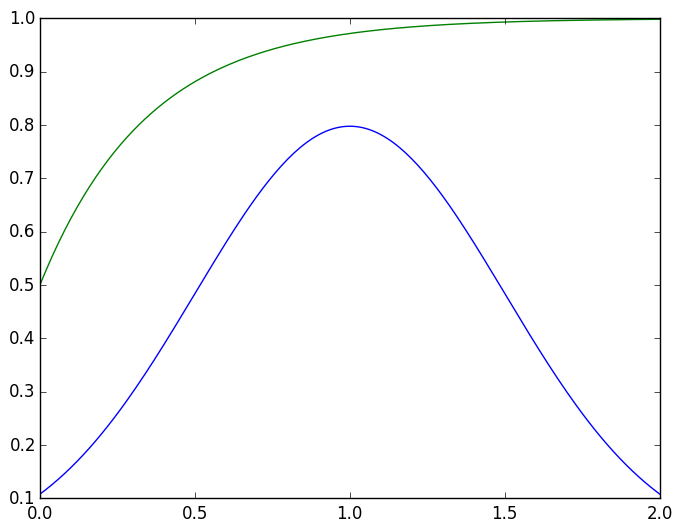

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32b69dcd0>

In [43]:
p = 0.5
xx = 0:0.01:2
d = Normal(1.0,0.5)
plot(xx,pdf(d,xx))
plot(xx,1 - (1-p).*(1-p^2).^(10.*xx))

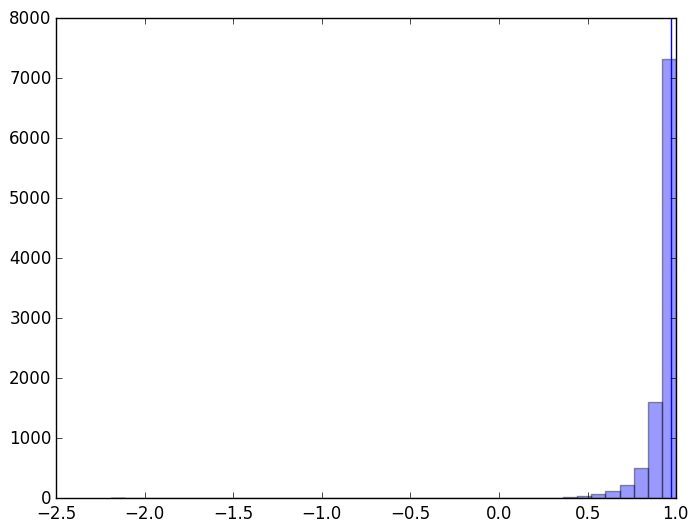

0.05762728838705815

In [44]:
n_trials = 10000
accum = zeros(n_trials)
for i = 1:n_trials
    yy = rand(d,2)
    yy_transform = 1 - (1-p).*(1-p^2).^(10.*yy)
    accum[i] = mean(yy_transform)
end
global_mean = 1 - (1-p).*(1-p^2).^(10.*1.0)

plt[:hist](accum,bins = 40,alpha=0.4)
axvline(global_mean)
mean(abs(accum-global_mean))

In [45]:
close("all")